In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread(r"C:\Users\priya\projects\imageclassification\model\test_images\rohitsharma.jpg")
img.shape

(277, 276, 3)

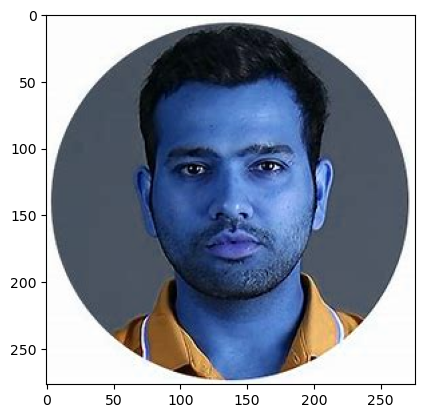

In [3]:
plt.imshow(img)

In [4]:
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(277, 276)

In [5]:
gray

array([[253, 253, 253, ..., 253, 253, 253],
       [253, 253, 253, ..., 253, 253, 253],
       [253, 253, 253, ..., 253, 253, 253],
       ...,
       [254, 254, 254, ..., 254, 254, 254],
       [253, 253, 253, ..., 253, 253, 253],
       [253, 253, 253, ..., 253, 253, 253]], dtype=uint8)

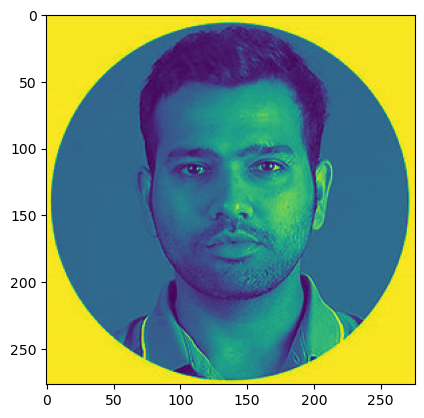

In [6]:
plt.imshow(gray)

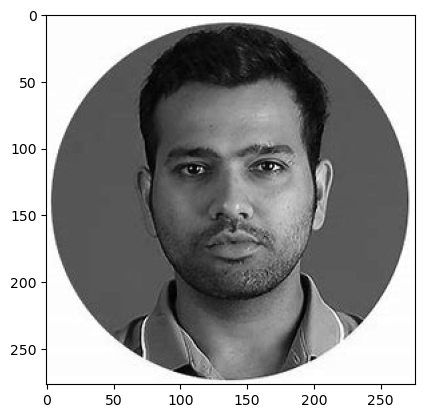

In [7]:
plt.imshow(gray, cmap='gray')

In [8]:
face_cascade=cv2.CascadeClassifier(r"C:\Users\priya\projects\imageclassification\model\opencv\haarcascade\haarcascade_frontalface_default.xml")
eye_cascade=cv2.CascadeClassifier(r"C:\Users\priya\projects\imageclassification\model\opencv\haarcascade\haarcascade_eye.xml")

faces=face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[ 62,  57, 152, 152]])

In [9]:
(x,y,w,h)=faces[0]
(x,y,w,h)

(62, 57, 152, 152)

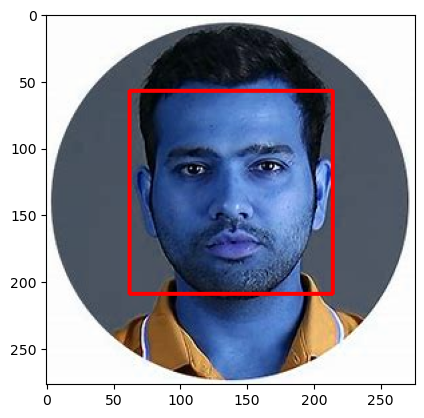

In [10]:
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)  #255=blue 0=green 0=red
plt.imshow(face_img)

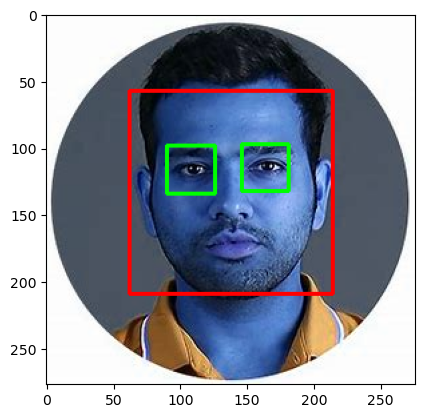

In [11]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray=gray[y:y+h, x:x+w]
    roi_color=face_img[y:y+h, x:x+w]
    eyes=eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color, (ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

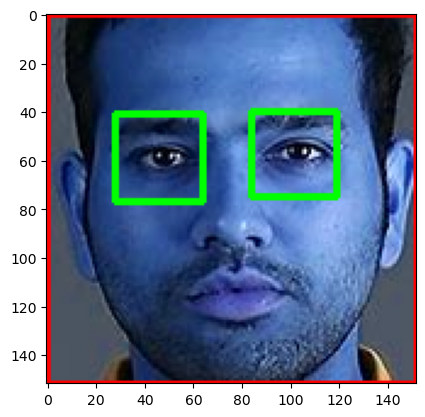

In [12]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [13]:
def get_cropped_image_if_2_eyes(image_path):
    img=cv2.imread(image_path)
    gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces:
        roi_gray=gray[y:y+h,x:x+w]
        roi_color=img[y:y+h,x:x+w]
        eyes=eye_cascade.detectMultiScale(roi_gray)
        if len(eyes)>=2:
            return roi_color

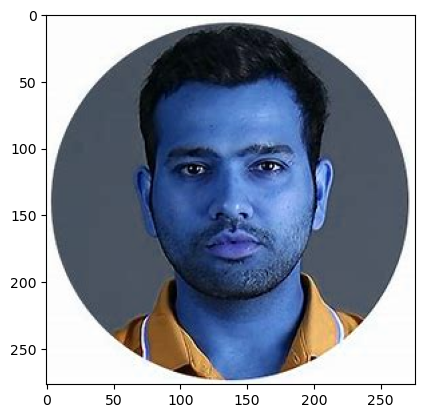

In [14]:
original_image=cv2.imread(r"C:\Users\priya\projects\imageclassification\model\test_images\rohitsharma.jpg")
plt.imshow(original_image)

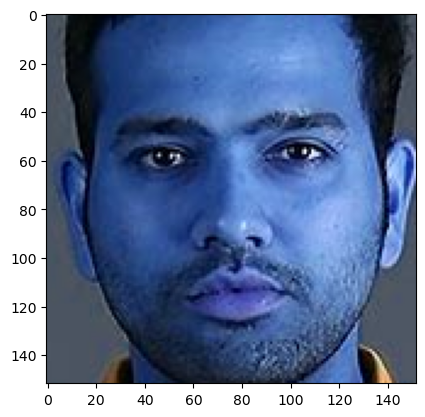

In [15]:
cropped_image=get_cropped_image_if_2_eyes(r"C:\Users\priya\projects\imageclassification\model\test_images\rohitsharma.jpg")
plt.imshow(cropped_image)

In [16]:
path_to_data=r"./model/dataset"
path_to_cr_data=r"./model/dataset/cropped"

In [17]:
import os
img_dirs=[]
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [18]:
img_dirs

['./model/dataset\\bumrah',
 './model/dataset\\kl_rahul',
 './model/dataset\\rohit_sharma',
 './model/dataset\\sachin_tendulkar',
 './model/dataset\\virat_kohli']

In [19]:
import shutil
if os.path.exists(path_to_cr_data):   # if this folder exists, then
    shutil.rmtree(path_to_cr_data)    # remove that folder
os.mkdir(path_to_cr_data)   # and make new folder in that path

In [20]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = os.path.basename(img_dir)
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = os.path.join(path_to_cr_data, celebrity_name)
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = os.path.join(cropped_folder, cropped_file_name)
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./model/dataset/cropped\bumrah
Generating cropped images in folder:  ./model/dataset/cropped\kl_rahul
Generating cropped images in folder:  ./model/dataset/cropped\rohit_sharma
Generating cropped images in folder:  ./model/dataset/cropped\sachin_tendulkar
Generating cropped images in folder:  ./model/dataset/cropped\virat_kohli


In [21]:
import pywt
import cv2
import numpy as np
def w2d(img, mode='haar', level=1):
    imArray=img
    #datatype conversion
    #convert to grayscale
    imArray=cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY)
    #convert to float
    imArray=np.float32(imArray)
    imArray/=255;
    #process coefficients
    coeffs=pywt.wavedec2(imArray, mode, level=level)
    coeffs_H=list(coeffs)
    coeffs_H[0]*=0

    #reconstruction
    imArray_H=pywt.waverec2(coeffs_H,mode)
    imArray_H= np.uint8(imArray_H)
    return imArray_H

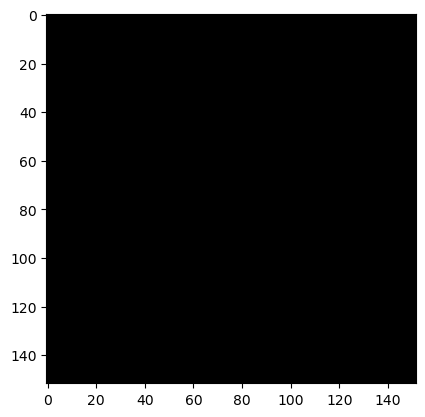

In [22]:
im_har=w2d(cropped_image,'db1',5)
plt.imshow(im_har,cmap='gray')

In [23]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'cropped\\bumrah': ['./model/dataset/cropped\\bumrah\\bumrah1.png',
  './model/dataset/cropped\\bumrah\\bumrah10.png',
  './model/dataset/cropped\\bumrah\\bumrah11.png',
  './model/dataset/cropped\\bumrah\\bumrah12.png',
  './model/dataset/cropped\\bumrah\\bumrah2.png',
  './model/dataset/cropped\\bumrah\\bumrah3.png',
  './model/dataset/cropped\\bumrah\\bumrah4.png',
  './model/dataset/cropped\\bumrah\\bumrah5.png',
  './model/dataset/cropped\\bumrah\\bumrah6.png',
  './model/dataset/cropped\\bumrah\\bumrah7.png',
  './model/dataset/cropped\\bumrah\\bumrah8.png',
  './model/dataset/cropped\\bumrah\\bumrah9.png'],
 'cropped\\kl_rahul': ['./model/dataset/cropped\\kl_rahul\\kl_rahul1.png',
  './model/dataset/cropped\\kl_rahul\\kl_rahul10.png',
  './model/dataset/cropped\\kl_rahul\\kl_rahul11.png',
  './model/dataset/cropped\\kl_rahul\\kl_rahul12.png',
  './model/dataset/cropped\\kl_rahul\\kl_rahul13.png',
  './model/dataset/cropped\\kl_rahul\\kl_rahul14.png',
  './model/dataset/cropped\

In [24]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'cropped\\bumrah': 0,
 'cropped\\kl_rahul': 1,
 'cropped\\rohit_sharma': 2,
 'cropped\\sachin_tendulkar': 3,
 'cropped\\virat_kohli': 4}

In [25]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name]) 

In [26]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(93, 4096)

In [27]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.4583333333333333

In [29]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         3
           4       0.45      0.90      0.60        10

    accuracy                           0.46        24
   macro avg       0.29      0.28      0.25        24
weighted avg       0.35      0.46      0.36        24



C:\Users\priya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\priya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\priya\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [31]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [32]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

C:\Users\priya\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\priya\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\priya\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


,model,best_score,best_params
0,svm,0.648352,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.549451,{'randomforestclassifier__n_estimators': 5}
2,logistic_regression,0.578022,{'logisticregression__C': 1}


In [33]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=5))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [34]:
best_estimators['svm'].score(X_test,y_test)

0.5416666666666666

In [35]:
best_estimators['random_forest'].score(X_test,y_test)

0.4166666666666667

In [36]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.5416666666666666

In [37]:
best_clf = best_estimators['svm']

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 3,  1,  0,  0,  0],
       [ 0,  0,  1,  0,  4],
       [ 1,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  3],
       [ 0,  0,  0,  0, 10]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

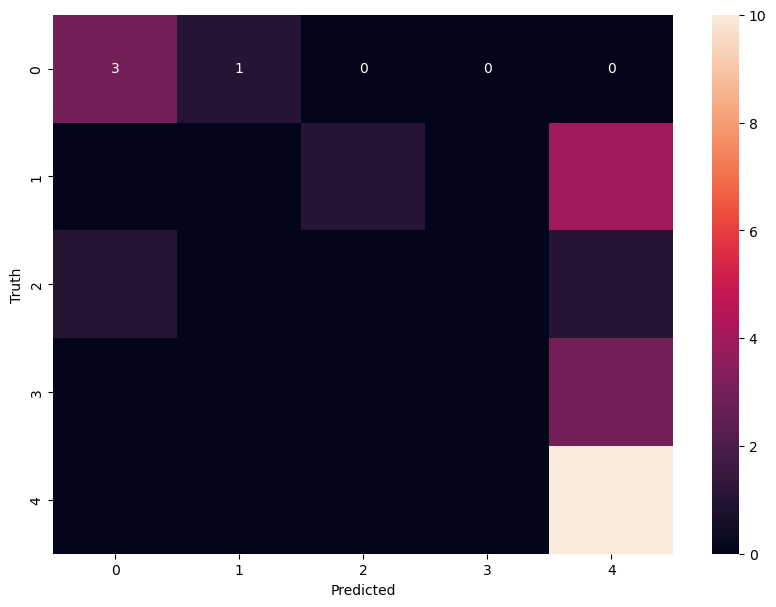

In [39]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [40]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [41]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))